## 一、数据分析的目的

通过分析朝阳医院2018年的月均消费次数，月均消费金额、客单价以及消费趋势等业务指标，了解朝阳医院在2018年里的销售情况。

## 二、数据分析基本过程

### 1、获取数据

In [1]:
# 导入相关包
import pandas as pd
import numpy as np

In [2]:
# 读取Excel文件
dataZY = pd.read_excel('朝阳医院2018年销售数据.xlsx')
dataZY.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


##### 查看数据类型，缺失情况

In [3]:
dataZY.shape  # 查看数据的形状，即几行几列
dataZY.index  # 查看索引
dataZY.columns  # 查看每一列的列表头内容
dataZY.count()  # 查看每一列数据统计数目

dataZY.isnull().any()  # 判断哪些”列”存在缺失值
dataZY[dataZY.isnull().values == True].drop_duplicates()  # 查看数据集中存在空值的行

(6578, 7)

RangeIndex(start=0, stop=6578, step=1)

Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')

购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64

购药时间    True
社保卡号    True
商品编码    True
商品名称    True
销售数量    True
应收金额    True
实收金额    True
dtype: bool

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.00
6571,2018-04-25 星期二,NaN,2367011.0,高特灵,2.0,11.2,9.86
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 总共有6578行、7列数据，但是“购药时间”和“社保卡号”这两列只有6576个数据，而“商品编码”一直到“实收金额”这些列都是只有6577个数据，这就意味着数据中存在缺失值，查看数据可知存在一行缺失值，此外“购药时间”和“社保卡号”这两列都各自存在一个缺失数据，这些缺失数据在后面步骤中需要进一步处理。

### 2、数据清洗

In [4]:
# 列名重命名，使用rename函数，把"购药时间" 改为 "销售时间"
dataZY.rename(columns={'购药时间': '销售时间'}, inplace=True)
dataZY.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


**1）缺失数据处理**

    缺失数据常用的处理方式为删除含有缺失数据的记录或者利用算法去补全缺失数据。

    本案例中缺失值少，对原数据不存在影响，故直接使用dropna函数删除缺失数据，具体如下：

In [5]:
print(f'删除缺失值前：{dataZY.shape}')
dataZY.info()

#使用dropna函数删除缺失值，重置索引后赋值给新的变量
dataZY_drop = dataZY.dropna().reset_index(drop=True)

print(f'\n删除缺失值后：{dataZY_drop.shape}')
dataZY_drop.info()

删除缺失值前：(6578, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
销售时间    6576 non-null object
社保卡号    6576 non-null float64
商品编码    6577 non-null float64
商品名称    6577 non-null object
销售数量    6577 non-null float64
应收金额    6577 non-null float64
实收金额    6577 non-null float64
dtypes: float64(5), object(2)
memory usage: 359.9+ KB

删除缺失值后：(6575, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 7 columns):
销售时间    6575 non-null object
社保卡号    6575 non-null float64
商品编码    6575 non-null float64
商品名称    6575 non-null object
销售数量    6575 non-null float64
应收金额    6575 non-null float64
实收金额    6575 non-null float64
dtypes: float64(5), object(2)
memory usage: 359.7+ KB


**2）删除重复数据**

In [6]:
dataZY_drop = dataZY_drop.drop_duplicates()  # 删除重复行
dataZY_drop.shape

(6575, 7)

操作后可发现数据并没有减少，即数据集中并无重复行。

**3）数据类型转换**

    对比原有数据类型，可以发现在实际数据分析过程中需要将“销售时间”改成时间格式，“社保卡号”和“商品编码”改成字符串（object）类型，因此需要对数据类型进行转换。

In [7]:
dataZY_Ctype = dataZY_drop.copy()  # 复制数据

# 提取字符串中的日期后转为时间格式
dataZY_Ctype['销售时间'] = pd.to_datetime(dataZY_drop['销售时间'].str[:10],
                                      format='%Y-%m-%d',
                                      errors='coerce')  #将无效值强制转换为NaT

# 将浮点型（float）数据转为字符串
dataZY_Ctype['社保卡号'] = dataZY_drop['社保卡号'].astype('object')
dataZY_Ctype['商品编码'] = dataZY_drop['商品编码'].astype('object')

dataZY_Ctype.head()  # 查看前5行数据
dataZY_Ctype.dtypes  # 查看每列的数据类型

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.61653e+06,236701,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,1.61653e+06,236701,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,1.26028e+07,236701,感康,2.0,16.8,15.00
3,2018-01-11,1.00703e+10,236701,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,1.01554e+08,236701,三九感冒灵,8.0,224.0,208.00


销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
dtype: object

In [8]:
dataZY_Ctype.info()  # 概览数据情况
dataZY_Ctype.isnull().any()  # 判断哪些”列”存在缺失值
len(dataZY_Ctype.loc[pd.isnull(dataZY_Ctype['销售时间']) ==
                     True, :])  # 统计“销售时间”为空值的行数
dataZY_Ctype.loc[pd.isnull(dataZY_Ctype['销售时间']) == True, :]  # 查看“销售时间”为空值的行

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6574
Data columns (total 7 columns):
销售时间    6552 non-null datetime64[ns]
社保卡号    6575 non-null object
商品编码    6575 non-null object
商品名称    6575 non-null object
销售数量    6575 non-null float64
应收金额    6575 non-null float64
实收金额    6575 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 410.9+ KB


销售时间     True
社保卡号    False
商品编码    False
商品名称    False
销售数量    False
应收金额    False
实收金额    False
dtype: bool

23

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
335,NaT,1.00741e+10,2.36701e+06,高特灵,2.0,11.2,10.0
513,NaT,1.00188e+10,2.36701e+06,开博通,2.0,56.0,50.0
514,NaT,1.00307e+10,2.36701e+06,开博通,4.0,112.0,106.0
515,NaT,1.00457e+10,2.36701e+06,开博通,10.0,280.0,274.0
516,NaT,1.61653e+06,2.36701e+06,开博通,4.0,112.0,112.0
1223,NaT,1.01395e+07,861409,非洛地平缓释片(波依定),2.0,65.0,58.0
1313,NaT,1.00404e+10,861417,雷米普利片(瑞素坦),3.0,85.5,85.5
1937,NaT,1.04868e+08,861458,复方利血平氨苯蝶啶片(北京降压0号),2.0,20.6,18.4
2132,NaT,1.17102e+07,861462,珍菊降压片,1.0,9.5,8.5
2243,NaT,1.00467e+10,861464,复方利血平片(复方降压片),2.0,6.0,5.6


转换日期过程中存在部分不符合日期格式的数值，且被转换为空值None，查看空值情况发现缺失数据较少，几乎不影响整体数据分布，故选择删除列（销售时间，社保卡号）中为空的行。

In [9]:
dataZY_clean = dataZY_Ctype.dropna(subset=['销售时间'], how='any').reset_index(
    drop=True)  # 删除“销售时间”列中有缺失值的行，重置索引后赋值给新的变量
dataZY_clean.isnull().any()  # 判断数据集中是否还有缺失值

销售时间    False
社保卡号    False
商品编码    False
商品名称    False
销售数量    False
应收金额    False
实收金额    False
dtype: bool

**4）数据排序**

    此时时间是没有按顺序排列的，将数据按时间排序，便于后续分析；排序之后索引会被打乱，所以也需要重置一下索引。

In [10]:
dataZY_clean = dataZY_clean.sort_values(['销售时间'], ascending=True).reset_index(
    drop=True)  # 按“销售时间”升序排列，并重置索引
dataZY_clean.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.61653e+06,236701,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01,1.07892e+08,861456,酒石酸美托洛尔片(倍他乐克),2.0,14.0,12.6
2,2018-01-01,1.61653e+06,861417,雷米普利片(瑞素坦),1.0,28.5,28.5
3,2018-01-01,1.0074e+10,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
4,2018-01-01,1.00143e+10,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


**5）异常值处理**

In [11]:
dataZY_clean.describe()  #查看数据的描述统计信息

,销售数量,应收金额,实收金额
count,6552.000000,6552.00000,6552.000000
mean,2.384158,50.43025,46.266972
std,2.374754,87.68075,81.043956
min,-10.000000,-374.00000,-374.000000
25%,1.000000,14.00000,12.320000
50%,2.000000,28.00000,26.500000
75%,2.000000,59.60000,53.000000
max,50.000000,2950.00000,2650.000000


通过描述统计信息可以看到，“销售数量”、“应收金额”、“实收金额”这三列数据的最小值出现了负数，这明显不符合常理，数据中存在异常值的干扰，因此要对数据进一步处理，以排除异常值的影响。

In [12]:
dataZY_clean = dataZY_clean.loc[dataZY_clean['销售数量'] > 0, :]  # 删除“销售数量”列中小于0的行
dataZY_clean.describe()  # 去除异常值后再次查看描述统计信息

,销售数量,应收金额,实收金额
count,6509.000000,6509.000000,6509.000000
mean,2.405285,50.908726,46.709935
std,2.364095,87.634645,80.983274
min,1.000000,1.200000,0.030000
25%,1.000000,14.000000,12.600000
50%,2.000000,28.000000,27.000000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


### 3、构建模型及数据可视化

- 数据清洗完成后，需要利用数据构建模型（即计算相应的业务指标），并用可视化的方式呈现结果。

 **1）业务指标1：月均消费次数**

    月均消费次数 = 总消费次数 / 月份数 （同一天内，同一个账户发生的所有消费算作一次消费）
   - **① 计算总消费次数：**

In [13]:
consume = dataZY_clean.drop_duplicates(subset=['销售时间', '社保卡号'])  # 删除同一天内的重复消费
totalConsumption = len(consume)
print(f'总消费次数：{totalConsumption}')

总消费次数：5345


- **② 计算月份数：**

In [14]:
totalDays = (dataZY_clean['销售时间'].max() -
             dataZY_clean['销售时间'].min()).days  # 计算天数
totalMonths = totalDays // 30  # 计算月份数
print(f'月份数：{totalMonths}')

月份数：6


- **③ 计算月均消费次数：**

In [15]:
avgConsumption = totalConsumption // totalMonths
print(f'业务指标1：月均消费次数 = {avgConsumption}')

业务指标1：月均消费次数 = 890


**2）业务指标2：月均消费金额**

    月均消费金额 = 总消费金额 / 月份数

In [16]:
totalMoney = dataZY_clean['实收金额'].sum()  # 总消费金额
avgMoney = totalMoney // totalMonths  # 月均消费金额
print(f'业务指标2：月均消费金额 = {avgMoney}')

业务指标2：月均消费金额 = 50672.0


**3）业务指标3：客单价**

    客单价 = 总消费金额 / 总消费次数

In [17]:
atv = totalMoney // totalConsumption
print(f'业务指标3：客单价 = {atv}')

业务指标3：客单价 = 56.0


**4）业务指标4：消费趋势**

In [18]:
# 导入相关包
import matplotlib.pyplot as plt
import matplotlib

# jupyter自带的方式，允许图表在cell中输出
%matplotlib inline

# 使用R语言中的ggplot2配色作为绘图风格
plt.style.use('ggplot')

# 画图时用黑体显示中文字符
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [19]:
drugSales = dataZY_clean  # 复制一份清洗好的数据，防止后续操作影响源数据
drugSales.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.61653e+06,236701,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01,1.07892e+08,861456,酒石酸美托洛尔片(倍他乐克),2.0,14.0,12.6
2,2018-01-01,1.61653e+06,861417,雷米普利片(瑞素坦),1.0,28.5,28.5
3,2018-01-01,1.0074e+10,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
4,2018-01-01,1.00143e+10,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


   - **① 分析每天的消费金额：**

In [20]:
drugSales.index = drugSales['销售时间']  # 重命名行索引（index）为销售时间所在列的值
drugSales.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
销售时间,,,,,,,
2018-01-01,2018-01-01,1.61653e+06,236701,强力VC银翘片,6.0,82.8,69.0
2018-01-01,2018-01-01,1.07892e+08,861456,酒石酸美托洛尔片(倍他乐克),2.0,14.0,12.6
2018-01-01,2018-01-01,1.61653e+06,861417,雷米普利片(瑞素坦),1.0,28.5,28.5
2018-01-01,2018-01-01,1.0074e+10,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
2018-01-01,2018-01-01,1.00143e+10,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0


D:\Anaconda\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '按天消费金额图')

Text(0.5, 0, '时间')

Text(0, 0.5, '实收金额')

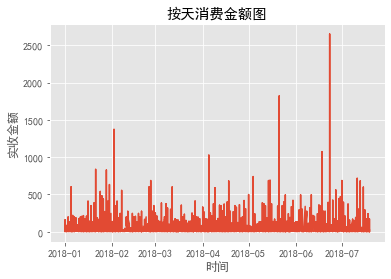

In [21]:
# 画图（按天消费金额图）
plt.plot(drugSales['实收金额'])

plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('实收金额')

# 保存图片
plt.savefig(r'C:\Users\ZK\Desktop\note\药品销售数据分析\picture\按天消费金额图.png')

#显示图片
plt.show()

从结果可以看出，每天消费总额差异较大，除了个别天出现比较大笔的消费，大部分天数的消费金额维持在500元以内。

   - **② 分析每月的消费金额：**

In [22]:
monMoneys = drugSales.groupby(drugSales.index.month).sum()  # 按月统计消费总额
monMoneys

,销售数量,应收金额,实收金额
销售时间,,,
1,2527.0,53561.6,49461.19
2,1858.0,42028.8,38790.38
3,2225.0,45318.0,41597.51
4,3010.0,54324.3,48812.70
5,2225.0,51263.4,46925.27
6,2328.0,52300.8,48327.70
7,1483.0,32568.0,30120.22


Text(0.5, 1.0, '按月消费金额图')

Text(0.5, 0, '月份')

Text(0, 0.5, '实收金额')

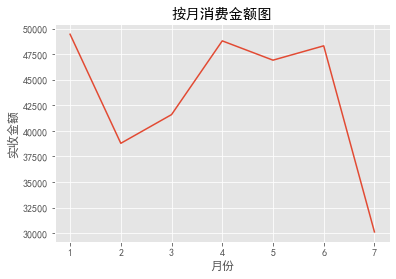

In [23]:
# 画图（按月消费金额图）
plt.plot(monMoneys['实收金额'])

plt.title('按月消费金额图')
plt.xlabel('月份')
plt.ylabel('实收金额')
plt.savefig(r'C:\Users\ZK\Desktop\note\药品销售数据分析\picture\按月消费金额图.png')
plt.show()

结果显示，7月消费金额最少，这是因为7月份的数据不完整，所以不具参考价值。

1月、4月、5月和6月的月消费金额差异不大，2月和3月的消费金额迅速降低，这可能是2月和3月处于春节期间，大部分人都回家过年的原因。

   - **③ 分析药品销售情况：**

In [24]:
# 统计各种药品的销售情况,并按药品销售数量降序排列
medicine = drugSales.groupby(['商品名称']).sum().sort_values('销售数量',
                                                         ascending=False)
medicine.head()

,销售数量,应收金额,实收金额
商品名称,,,
苯磺酸氨氯地平片(安内真),1781.0,22315.0,19081.44
开博通,1440.0,40689.0,37080.36
酒石酸美托洛尔片(倍他乐克),1140.0,8780.4,7919.82
硝苯地平片(心痛定),825.0,1271.5,1108.99
苯磺酸氨氯地平片(络活喜),796.0,26249.4,24251.04


In [25]:
# 截取销售量最多的十种药品
top_medicine = medicine.iloc[:10,:]
top_medicine

,销售数量,应收金额,实收金额
商品名称,,,
苯磺酸氨氯地平片(安内真),1781.0,22315.0,19081.44
开博通,1440.0,40689.0,37080.36
酒石酸美托洛尔片(倍他乐克),1140.0,8780.4,7919.82
硝苯地平片(心痛定),825.0,1271.5,1108.99
苯磺酸氨氯地平片(络活喜),796.0,26249.4,24251.04
复方利血平片(复方降压片),515.0,1547.6,1397.38
G琥珀酸美托洛尔缓释片(倍他乐克),509.0,9648.1,8620.96
缬沙坦胶囊(代文),445.0,17731.0,16774.77
非洛地平缓释片(波依定),375.0,11416.0,10419.56


Text(0.5, 1.0, '药品销售前十情况')

Text(0.5, 0, '药品种类')

Text(0, 0.5, '销售数量')

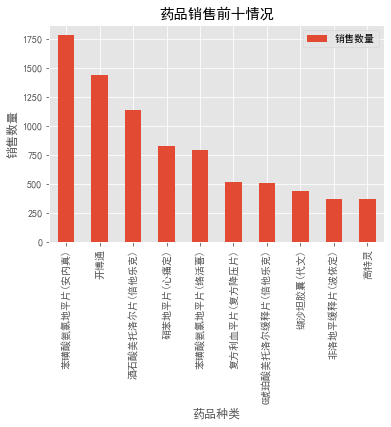

In [26]:
# 用条形图展示销售量前十的药品
top_medicine['销售数量'].plot(kind='bar')

plt.title('药品销售前十情况')
plt.xlabel('药品种类')
plt.ylabel('销售数量')
plt.legend(loc=0)
plt.savefig(r'C:\Users\ZK\Desktop\note\药品销售数据分析\picture\药品销售前十情况.png')
plt.show()

得到销售量前十的药品信息，有助于加强医院对药房的管理。